Индивидуальный проект: Suicide Rates Overview 1985 to 2016

Автор: **Абрамова Анна**


#### Используемый датасет для анализа :
Suicide Rates Overview 1985 to 2016
Ссылка: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
import sklearn

In [2]:
#Читаем наш датасет и выводим первые 5 строк с помощью df.head()
df = pd.read_csv('../Downloads/dataset/master.csv')
#Меняем название столбцов
df.columns=['country', 'year', 'sex', 'age', 'suicides_no', 'population','suicidesper100k', 'country-year', 'HDI for year', 'GDPpyear', 'GDPpcapita', 'generation']
df.head()

,country,year,sex,age,suicides_no,population,suicidesper100k,country-year,HDI for year,GDPpyear,GDPpcapita,generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [3]:
print(df.shape) #Вывод количества строк и столбцов

print(df.columns.values) #Dsdjl названия столбцов

(27820, 12)
['country' 'year' 'sex' 'age' 'suicides_no' 'population' 'suicidesper100k'
 'country-year' 'HDI for year' 'GDPpyear' 'GDPpcapita' 'generation']


In [4]:
###Проверка полноты признаков, если пропусков у признака слишком много (более 70%), такой признак удаляют
df.isnull().mean() * 100

country             0.000000
year                0.000000
sex                 0.000000
age                 0.000000
suicides_no         0.000000
population          0.000000
suicidesper100k     0.000000
country-year        0.000000
HDI for year       69.935298
GDPpyear            0.000000
GDPpcapita          0.000000
generation          0.000000
dtype: float64

In [5]:
df['HDI for year'].describe()

count    8364.000000
mean        0.776601
std         0.093367
min         0.483000
25%         0.713000
50%         0.779000
75%         0.855000
max         0.944000
Name: HDI for year, dtype: float64

In [6]:
###Удаляем столбец с именем HDI for year, в axis пишем 1,если удаляем стобец, 0, если строку
df.drop(['HDI for year'] , axis = 1 , inplace = True)

In [7]:
df.drop(df[df.year == 2016].index , inplace = True)

In [8]:
df.shape

(27660, 11)

In [9]:
#Информация о количестве колонок и их названии, количестве непустых строк для кажой из колонок (признаков),типе данных, хранящихся в колонке.
df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   country          27660 non-null  object 
 1   year             27660 non-null  int64  
 2   sex              27660 non-null  object 
 3   age              27660 non-null  object 
 4   suicides_no      27660 non-null  int64  
 5   population       27660 non-null  int64  
 6   suicidesper100k  27660 non-null  float64
 7   country-year     27660 non-null  object 
 8   GDPpyear         27660 non-null  object 
 9   GDPpcapita       27660 non-null  int64  
 10  generation       27660 non-null  object 
dtypes: float64(1), int64(4), object(6)
memory usage: 2.5+ MB


<AxesSubplot: >

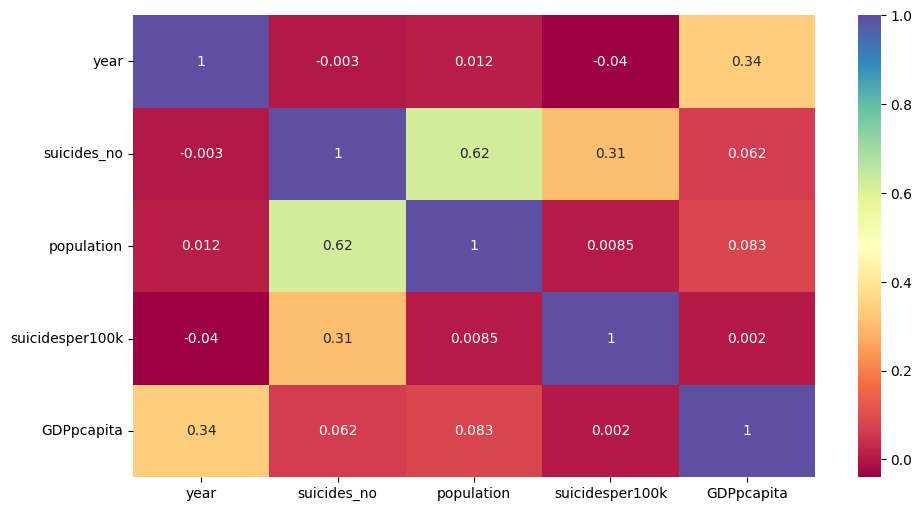

In [10]:
# Кореляция 
# sns.heatmap - функция для построение тепловой карты
# Функция corr() используется для возврата корреляционной матрицы.Аргумент cmap изменяет цветовую схему.
# Параметр annot используется для отображения значений корреляции на квадратах. 

plt.figure(figsize=(11,6))
sns.heatmap(df.corr(),annot=True,cmap='Spectral')

Кореляция, за исключением коряции между населением (population) и колиечством самоубийств(suicides_no), низкая.

Построим график, показывающий среднее значение по Странам

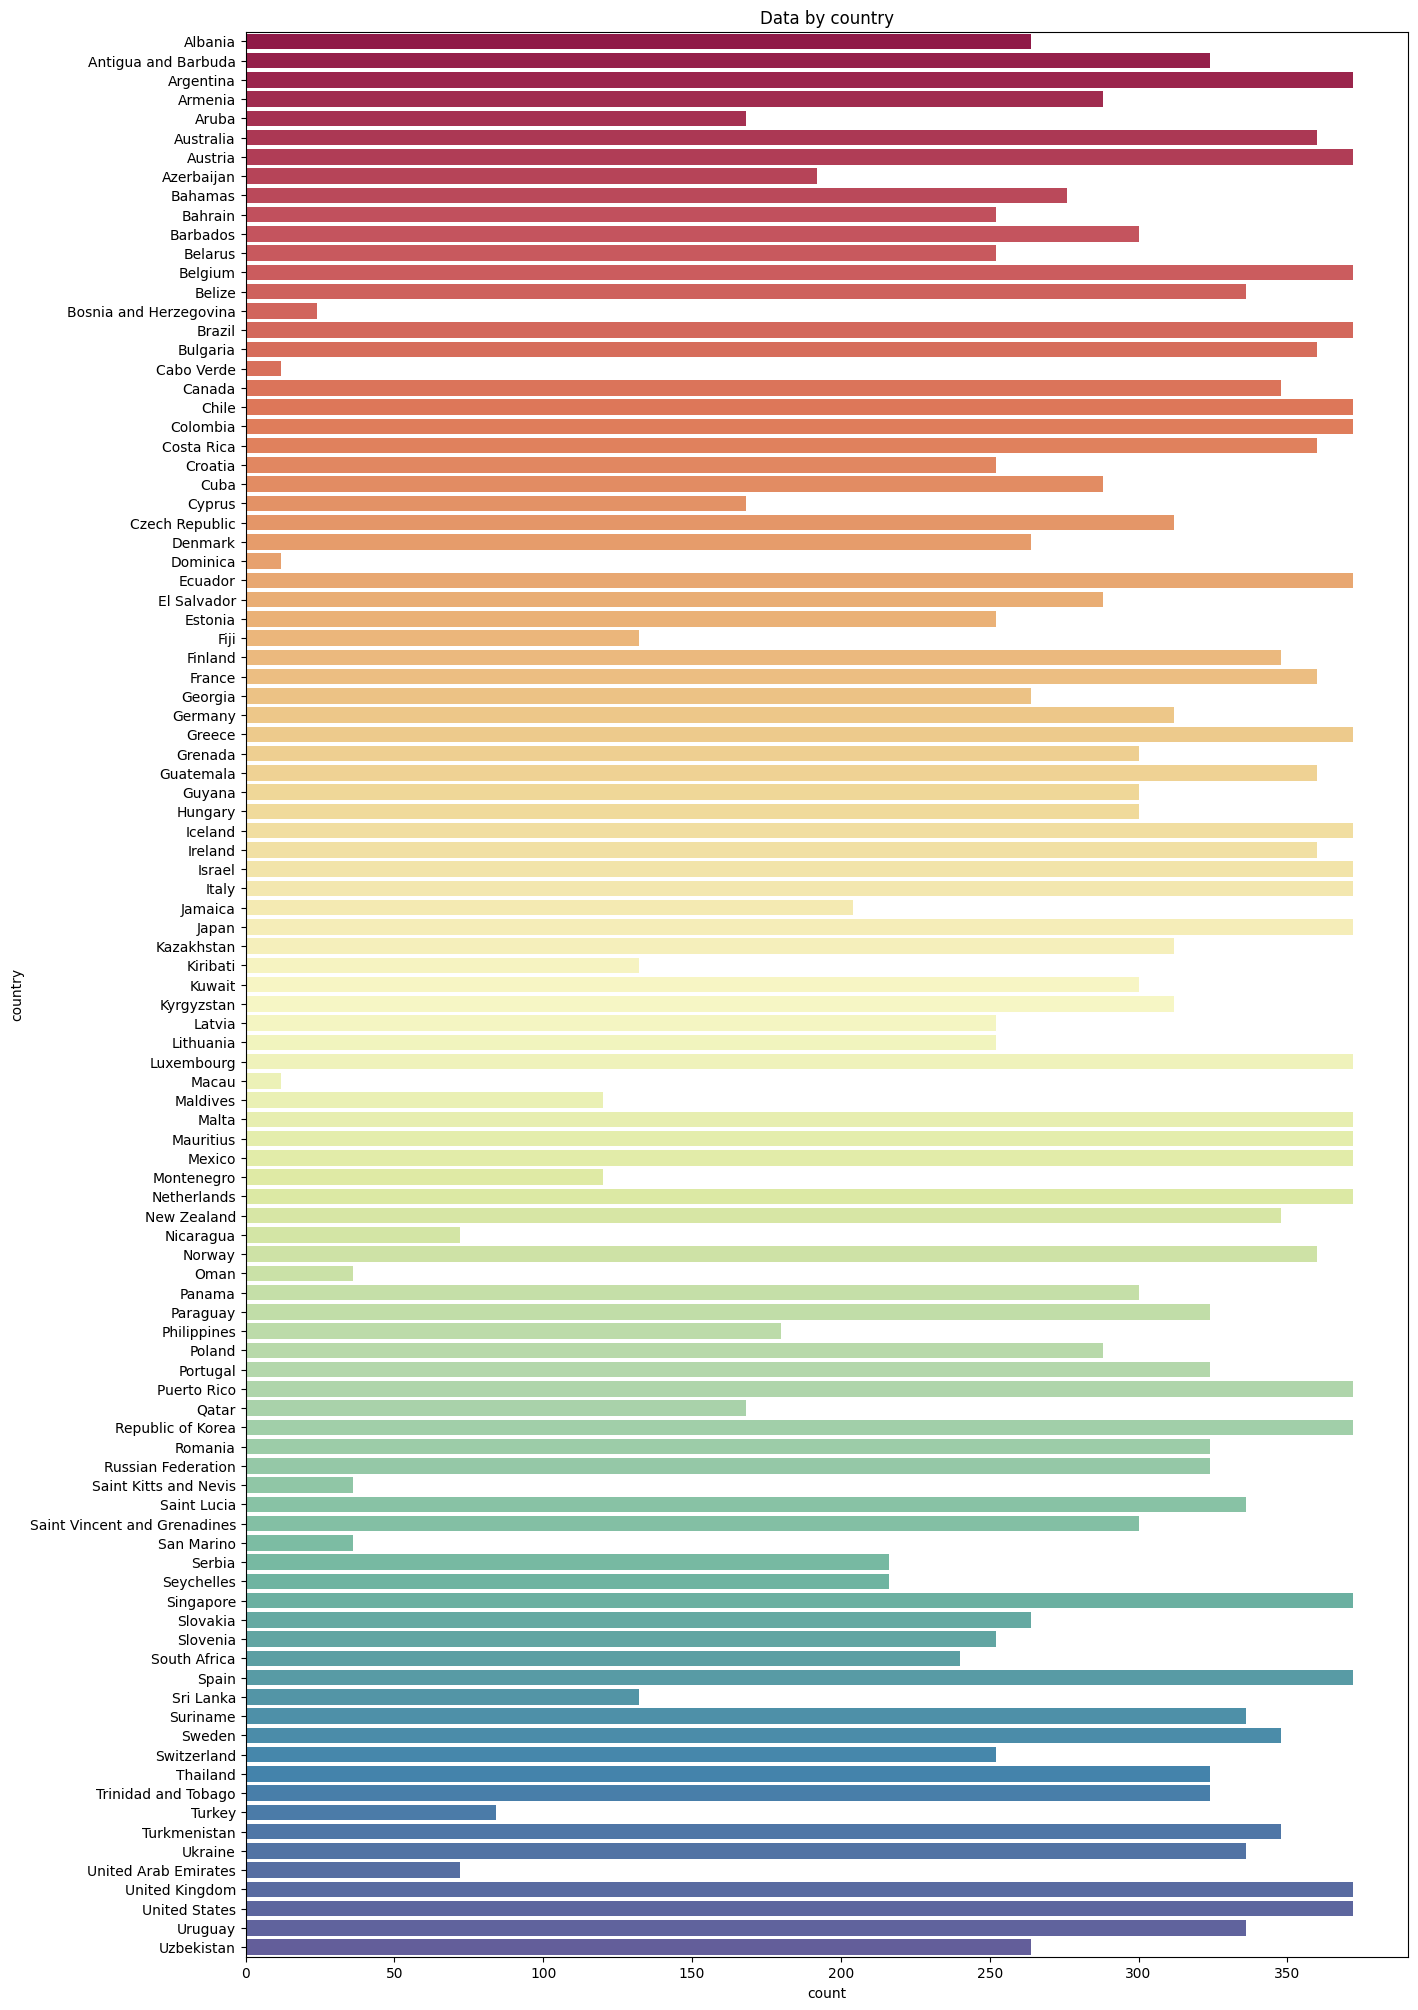

In [11]:
# sns.countplot- функция, которая считает количество значений в каждой категории.
plt.figure(figsize = (15,25))
sns.countplot(y = df['country'] , palette='Spectral' )
plt.title('Data by country')
plt.show()

Построим график, показывающий среднее количесnво самоубийств среди мужчин и женщин 

<AxesSubplot: xlabel='sex', ylabel='suicides_no'>

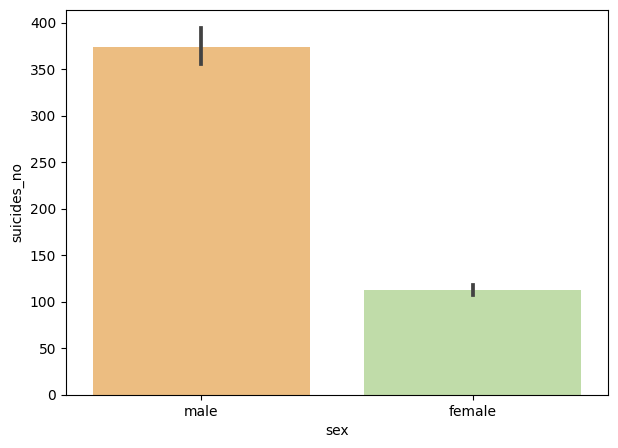

In [12]:
# sns.barplot - используется для отображения среднего значения для каждого значения 
# в категориальном столбце по сравнению с числовым столбцом. 
# Первый параметр - это категориальный столбец, второй параметр - это числовой столбец

plt.figure(figsize = (7,5))
sns.barplot(x = df['sex'] , y  = df['suicides_no'] , palette='Spectral')

Из графика выше мы можем сдлеать следующий вывод : Средний показатель самоубийств среди мужчин выше,чем среди женщин

Выясним у людей какого поколения среди двух полов средний показатель самоубийства выше.

<AxesSubplot: xlabel='sex', ylabel='suicides_no'>

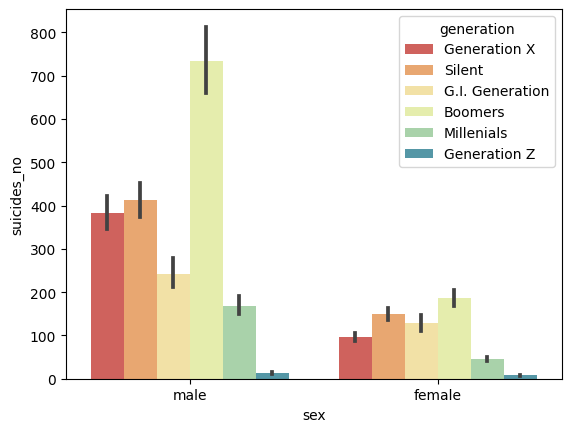

In [13]:
sns.barplot(x = df['sex'] , y = df['suicides_no'] , hue = df['generation'],palette='Spectral')

Можем заметить, что среди мужчин показатель самоуйбиств значительно выше у "Бумеров", следующее поколение -"Молчаливое поколение". Среди женщин рапсределение более равномерное. Самый высокий показатель самоуйбиства также у поколения "Бумеров"

Выясним у людей какого возраста среди двух полов средний показатель самоубийства выше.

<AxesSubplot: xlabel='sex', ylabel='suicides_no'>

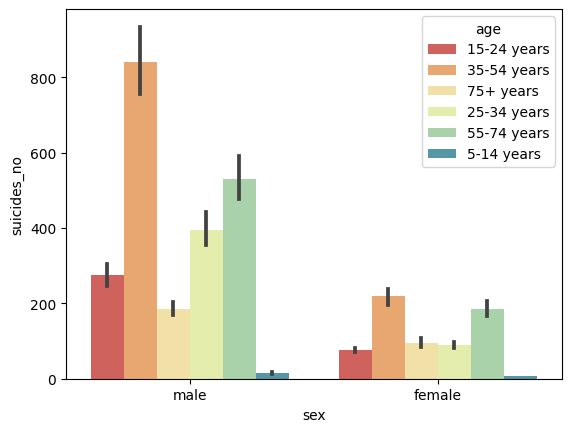

In [14]:
sns.barplot(x = df['sex'] , y  = df['suicides_no'] ,hue = df['age'], palette='Spectral')

Показатель самоубийства мужчин в возрасте 35-54 лет самый высокий. Самый высокий среди женщин - женщины в возрасте 35-54.

Посмотрим график линейной зависимотси между количесвтом самоубийств и года.

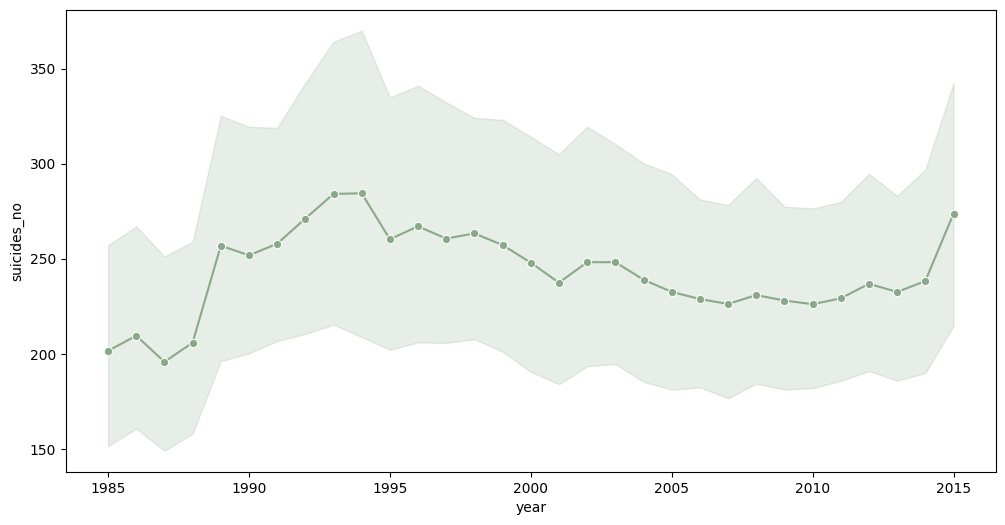

In [15]:
# sns.lineplot- создает линейные диаграмы.
plt.figure(figsize=(12,6))
sns.lineplot(x=df['year'],y=df['suicides_no'],color = '#88aa89', marker='o');

Посмотрим график линейной зависимотси между количеством самоубийств на 100 тыс человек населения и года.

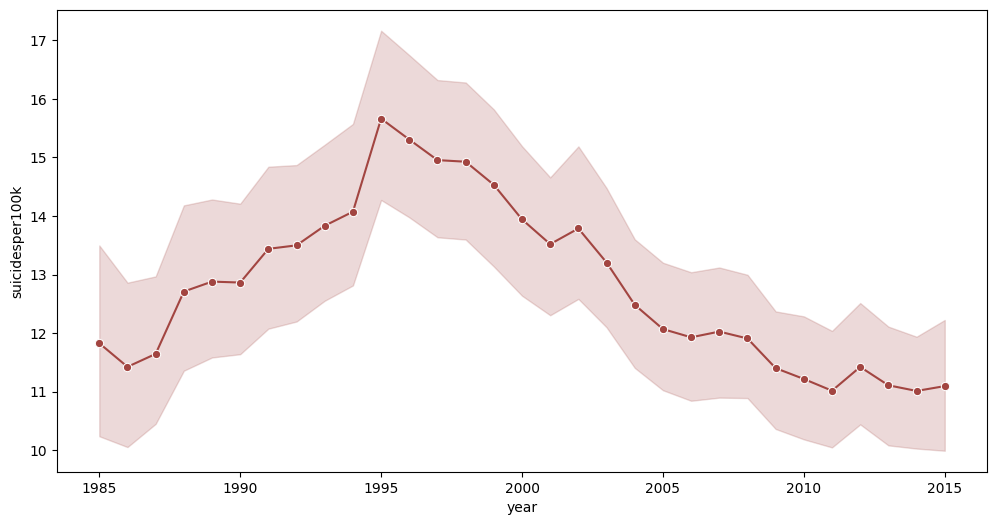

In [16]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='suicidesper100k',marker='o',color = '#a24541',data=df);

График линейной зависимотси между количесвтом самоубийств и года с разделением на два пола.

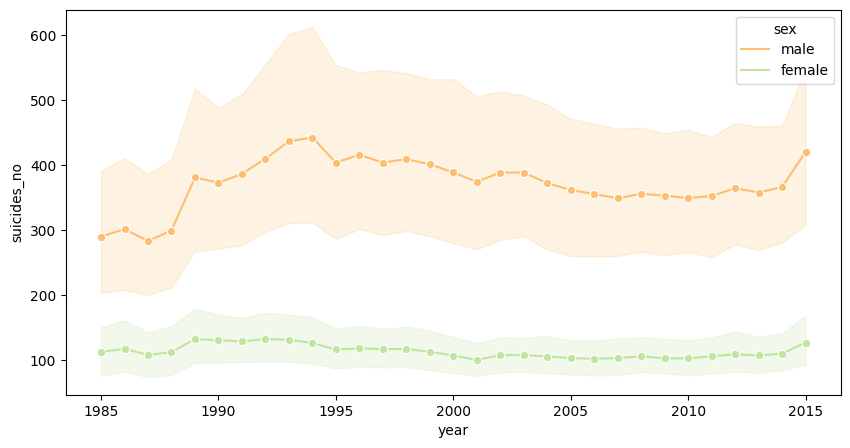

In [17]:
plt.figure(figsize=(10,5))
sns.lineplot(x='year',y='suicides_no',hue='sex',palette='Spectral',marker='o',data=df);

График линейной зависимотси между количеством самоубийств на 100 тыс человек населения и года с разделением на два пола.

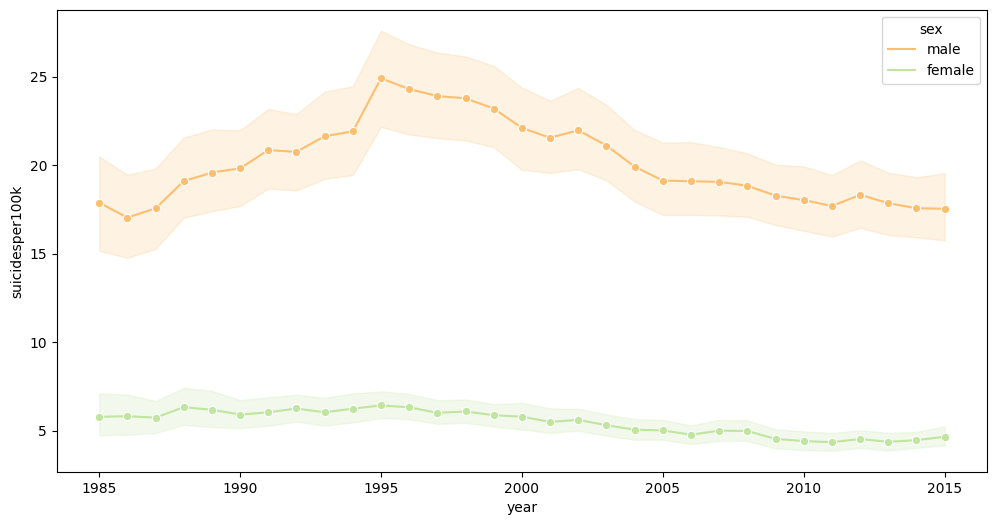

In [18]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='suicidesper100k',hue='sex',marker='o',data=df,palette='Spectral');

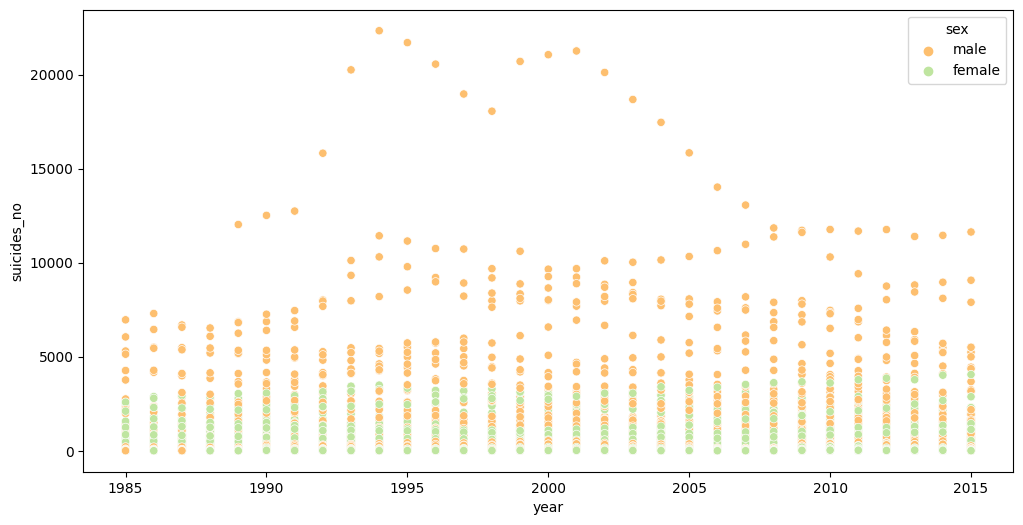

In [19]:
# sns.scatterplot - построение точечной диаграмы. 
plt.figure(figsize=(12,6))
sns.scatterplot(x='year',y='suicides_no',hue='sex',data=df,palette='Spectral');

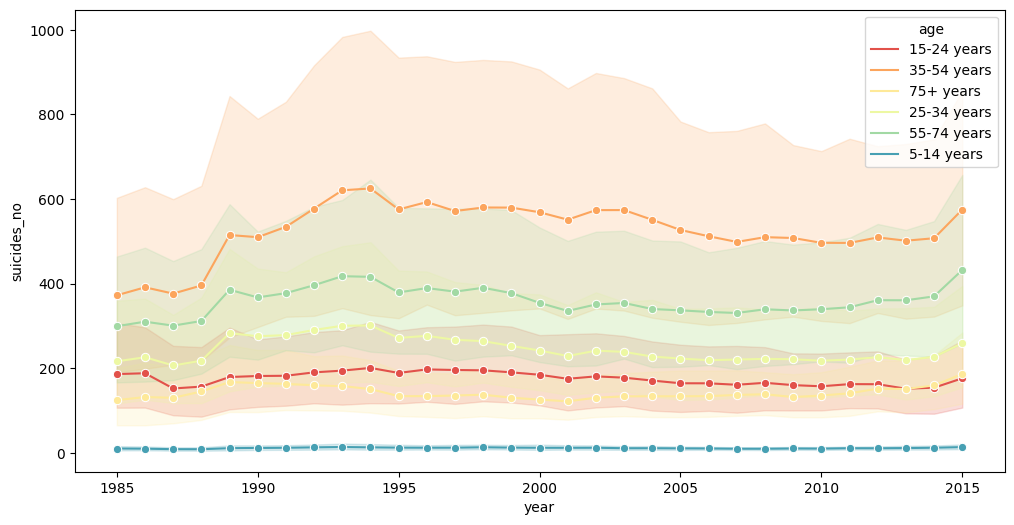

In [20]:
plt.figure(figsize=(12,6))
sns.lineplot(x='year',y='suicides_no',hue='age',marker='o',data=df,palette='Spectral');

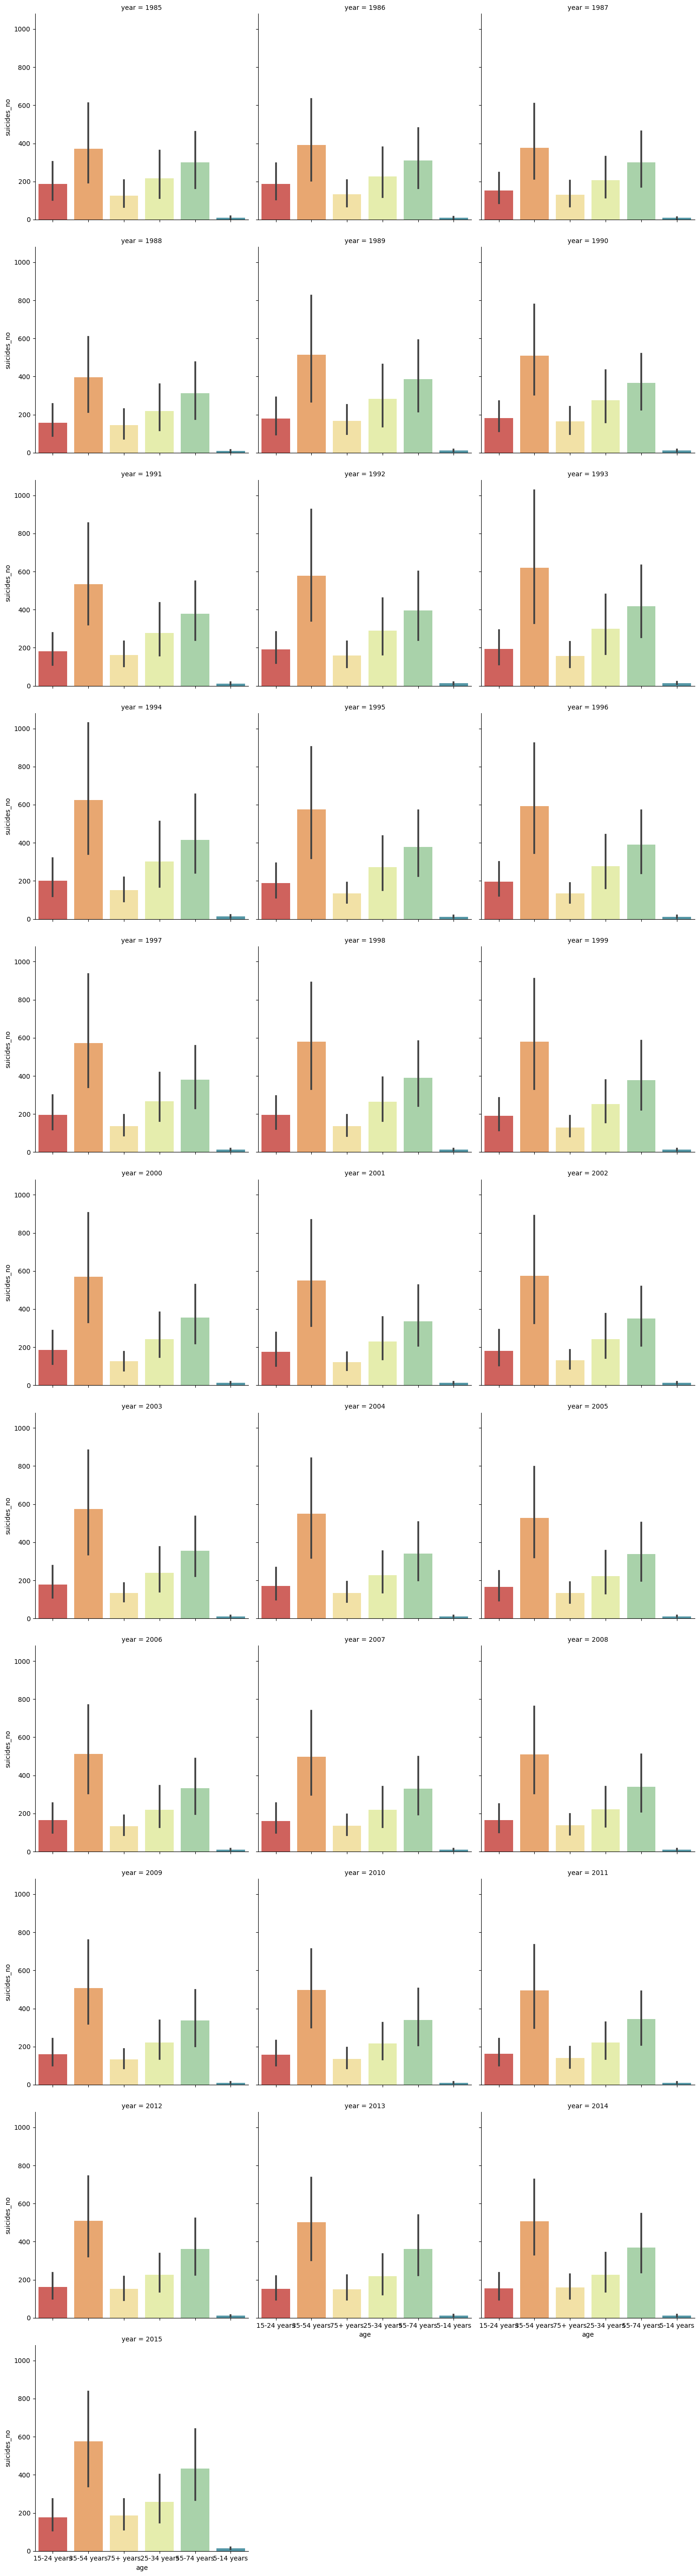

In [21]:
sns.catplot(x='age',y='suicides_no',col='year',data=df,kind='bar',col_wrap=3,palette='Spectral');

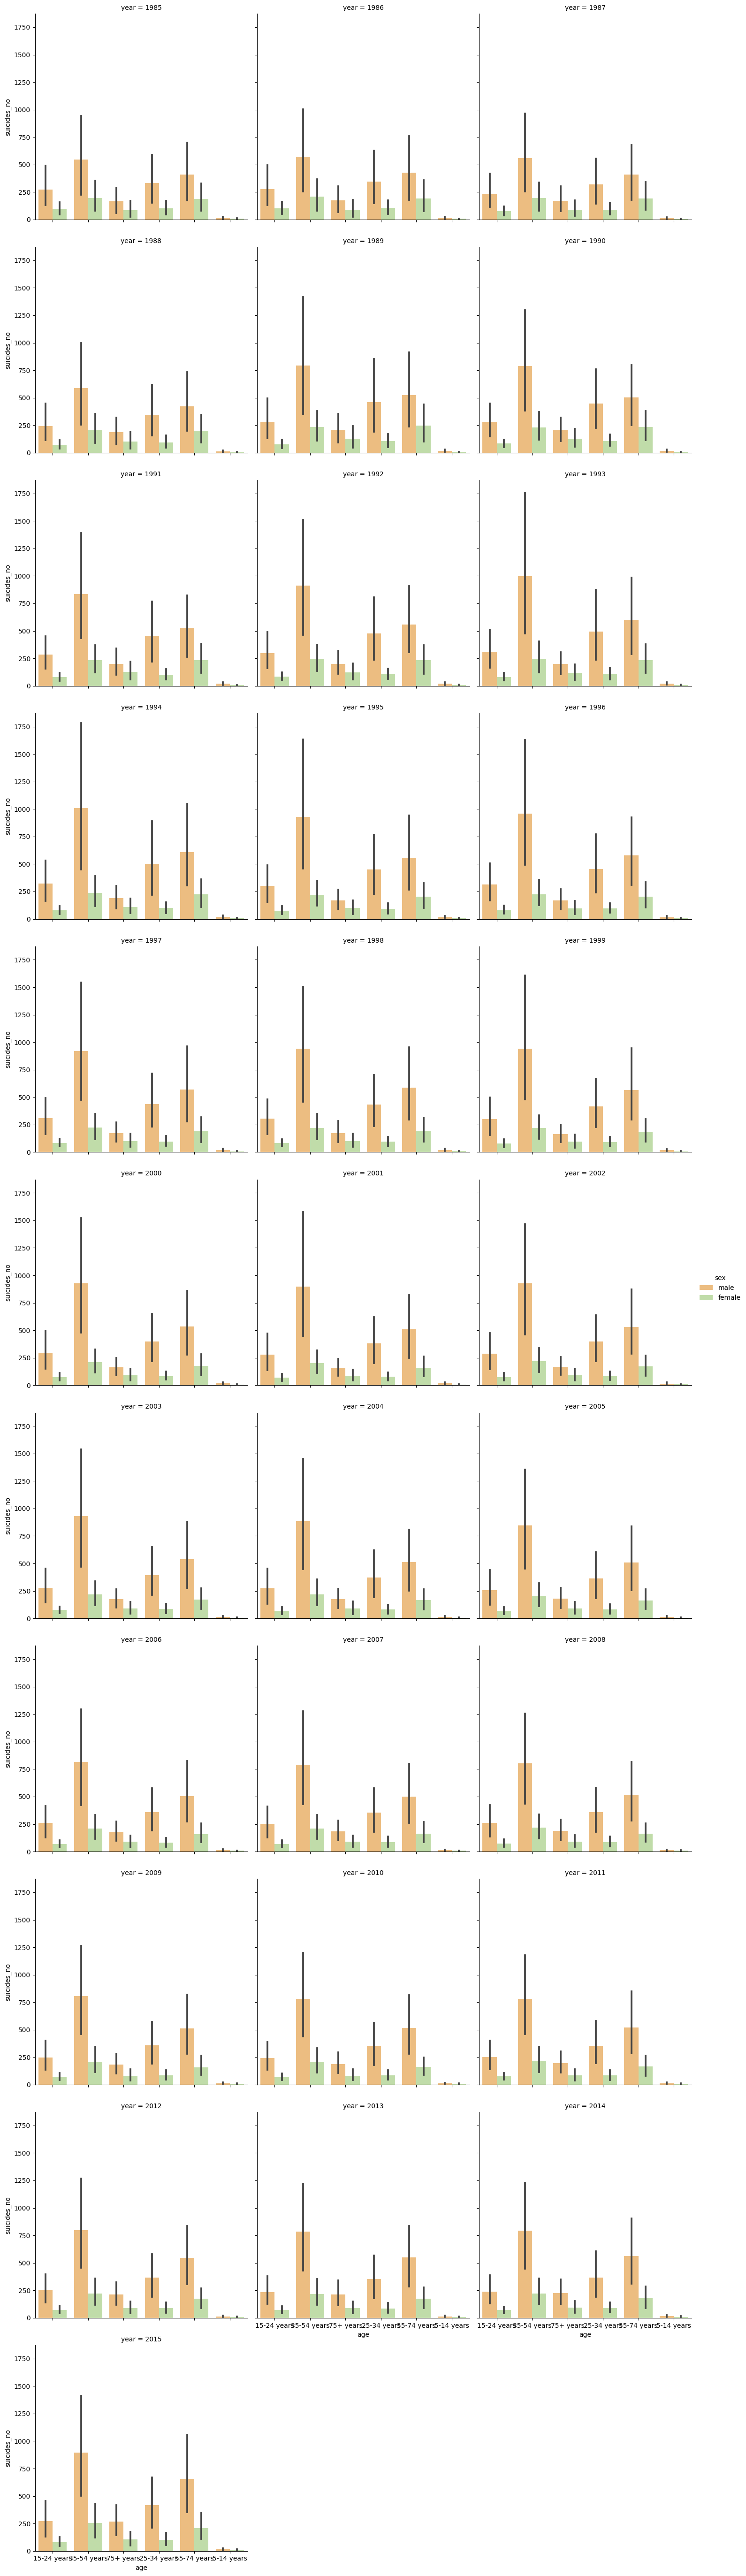

In [22]:
sns.catplot(x='age',y='suicides_no',hue='sex',col='year',data=df,kind='bar',col_wrap=3,palette='Spectral');

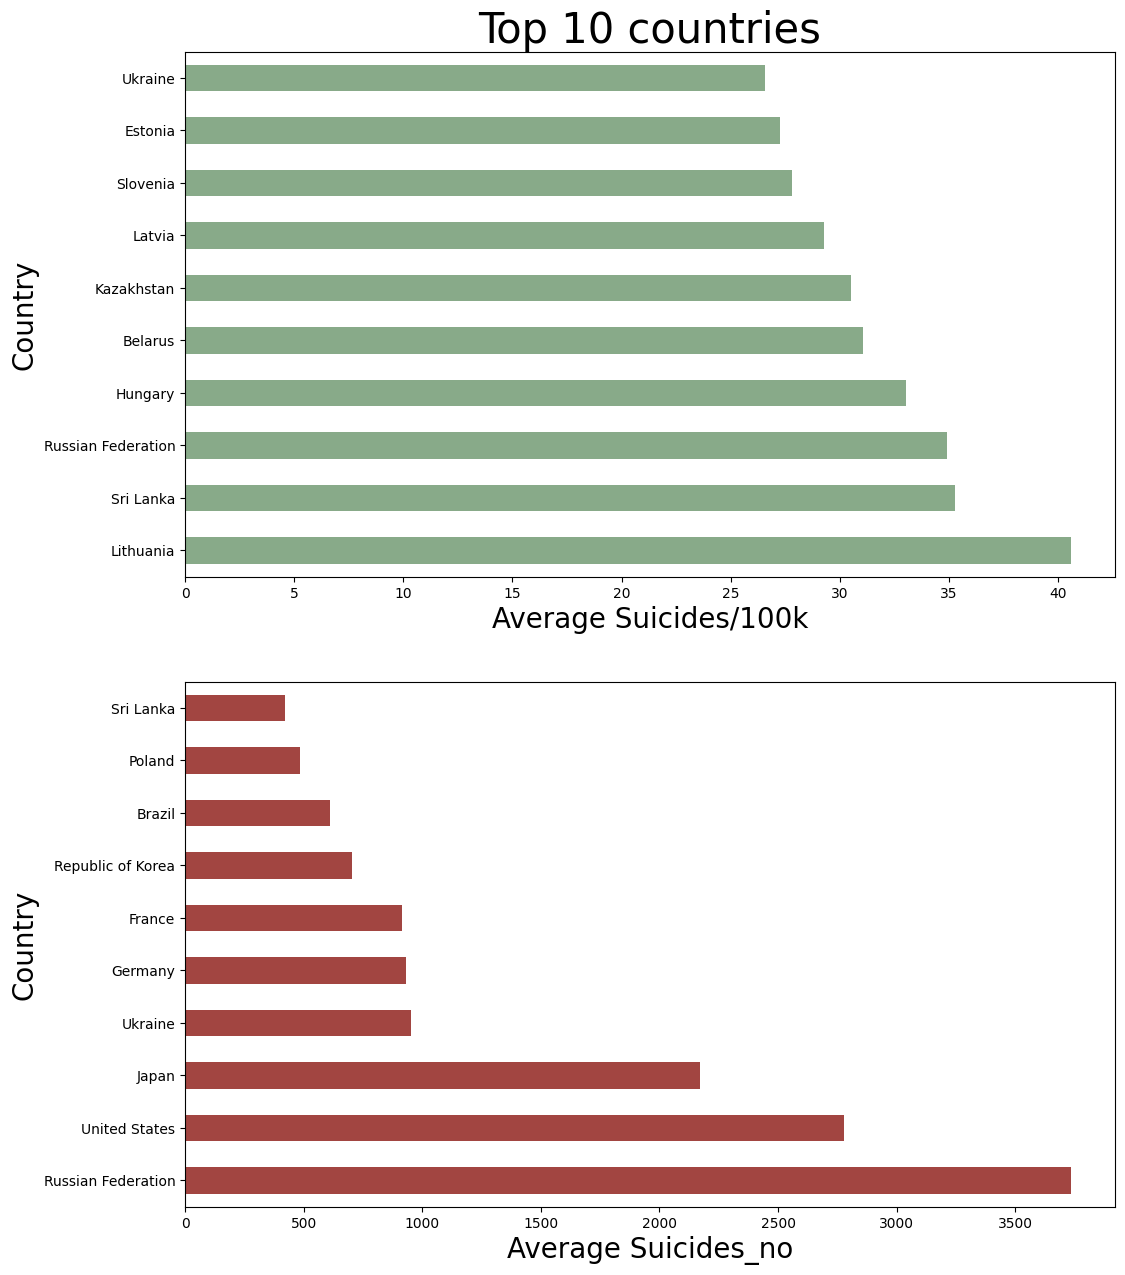

In [23]:
plt.figure(figsize=(12, 15))


plt.subplot(211)
df.groupby(['country']).suicidesper100k.mean().nlargest(10).plot(kind='barh', color = '#88aa89')
plt.xlabel('Average Suicides/100k', size=20)
plt.ylabel('Country', fontsize=20)
plt.title('Top 10 countries', fontsize=30)

plt.subplot(212)
df.groupby(['country']).suicides_no.mean().nlargest(10).plot(kind='barh',color = '#a24541')
plt.xlabel('Average Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

Лидирующая страна по количеству самоубийства на 100 тыс. человек  - Литва.
Страна с самым высоким показателем самоубийств- Российская Федерация 

Выведем в таблицу года в которых было совершенно больше всего самоубийств.

In [24]:
year_suicides = df.groupby('year')[['suicides_no']].sum().reset_index()
year_suicides.sort_values(by='suicides_no', ascending=False).style.background_gradient(cmap='Spectral', subset=['suicides_no'])

,year,suicides_no
14,1999,256119
17,2002,256095
18,2003,256079
15,2000,255832
16,2001,250652
13,1998,249591
11,1996,246725
10,1995,243544
24,2009,243487
19,2004,240861


Как мы можем увидеть из таблицы год с самым высоким количеством самоубийств это 1999-й год. 

Рассмотрим самоубийства мужчин и женщин в разных странах.

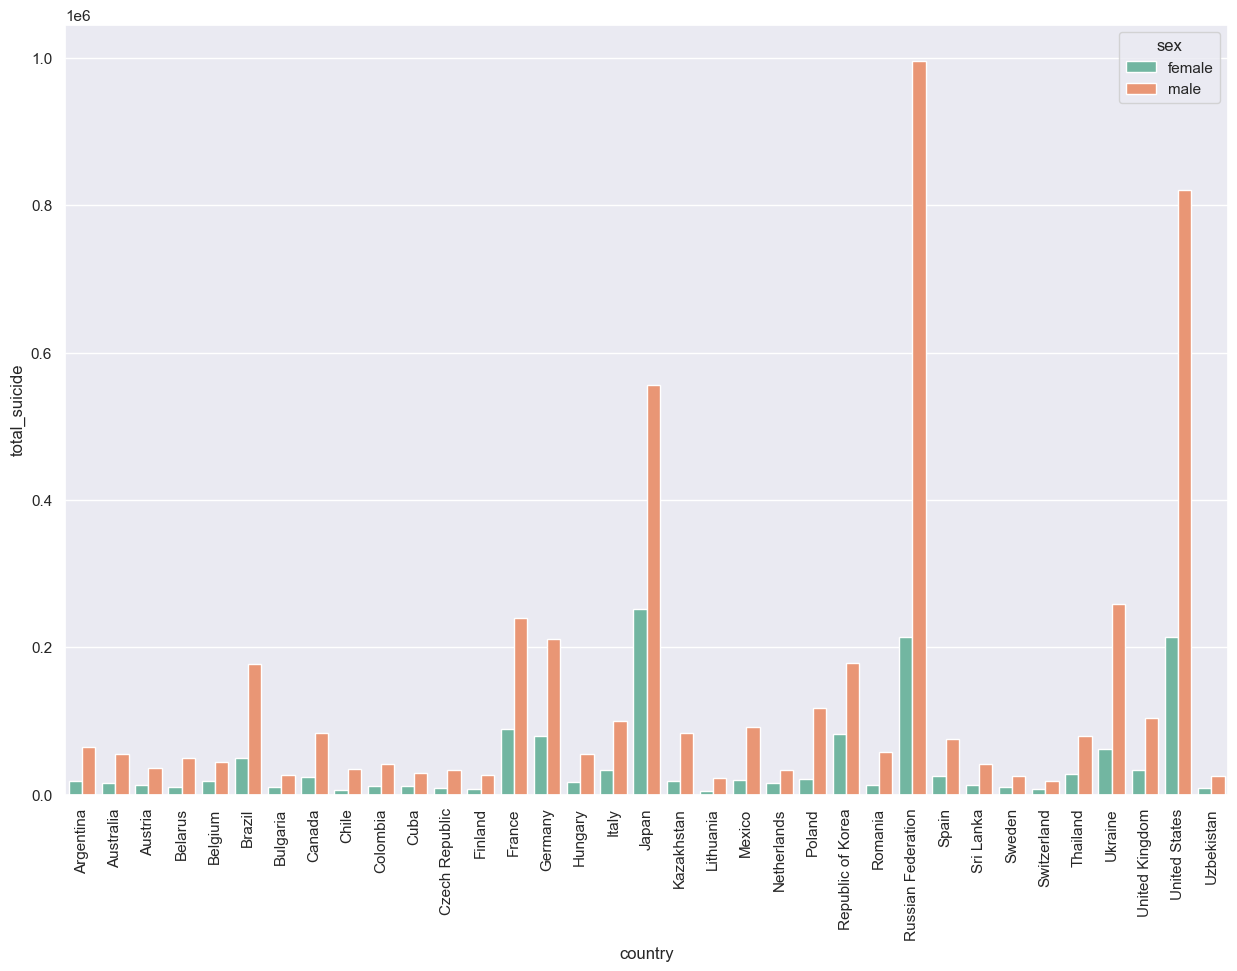

In [25]:
data_country_no = df.groupby(by=['country', 'sex']).agg({'suicides_no': ['sum']})
data_country_no.columns = ['total_suicide']
data_country_no.reset_index(inplace=True)
data_country_name = data_country_no.sort_values(by=['total_suicide'], ascending=False)
data_country_name = data_country_name.head(50)
data_country_name = data_country_name['country']

data_country_no = data_country_no[data_country_no['country'].isin(data_country_name)]
# data_country_no.head()

color = sns.color_palette("Set2")
sns.set(style="darkgrid")
plt.figure(figsize=(15, 10))
sns.barplot(x='country', y='total_suicide', hue='sex', data=data_country_no, palette=color)
plt.xticks(rotation=90)

plt.show()

Больше всего совершают самоубийства мужчины в Российской Федерации, а женщины - в Японии. 
Высокий показатель самоубийств мужчин в России может быть связан с множеством факторов, например, алкоголизм или наркотики, экономическая и политическая ситуцаии в стране,давление из-за нетрадиционной ориентации, у подростков причиной суицида может быть неразделенная любовь, несданный экзамен.
Частой причиной самоубийств в Японии является переработка, для такой смерти даже введен термин кароси - «смерть от переработки». Так же причиной смерти может быть издевательство в школах, разнагласия в семье, сложнопереживаемый развод.

Цель данной работы предсказать коэффициент самоубийств. Для этого используем задачу регрессии. Создадим матрицы выбросов с помощью функции scatter_matrix.

<Figure size 2000x1000 with 0 Axes>

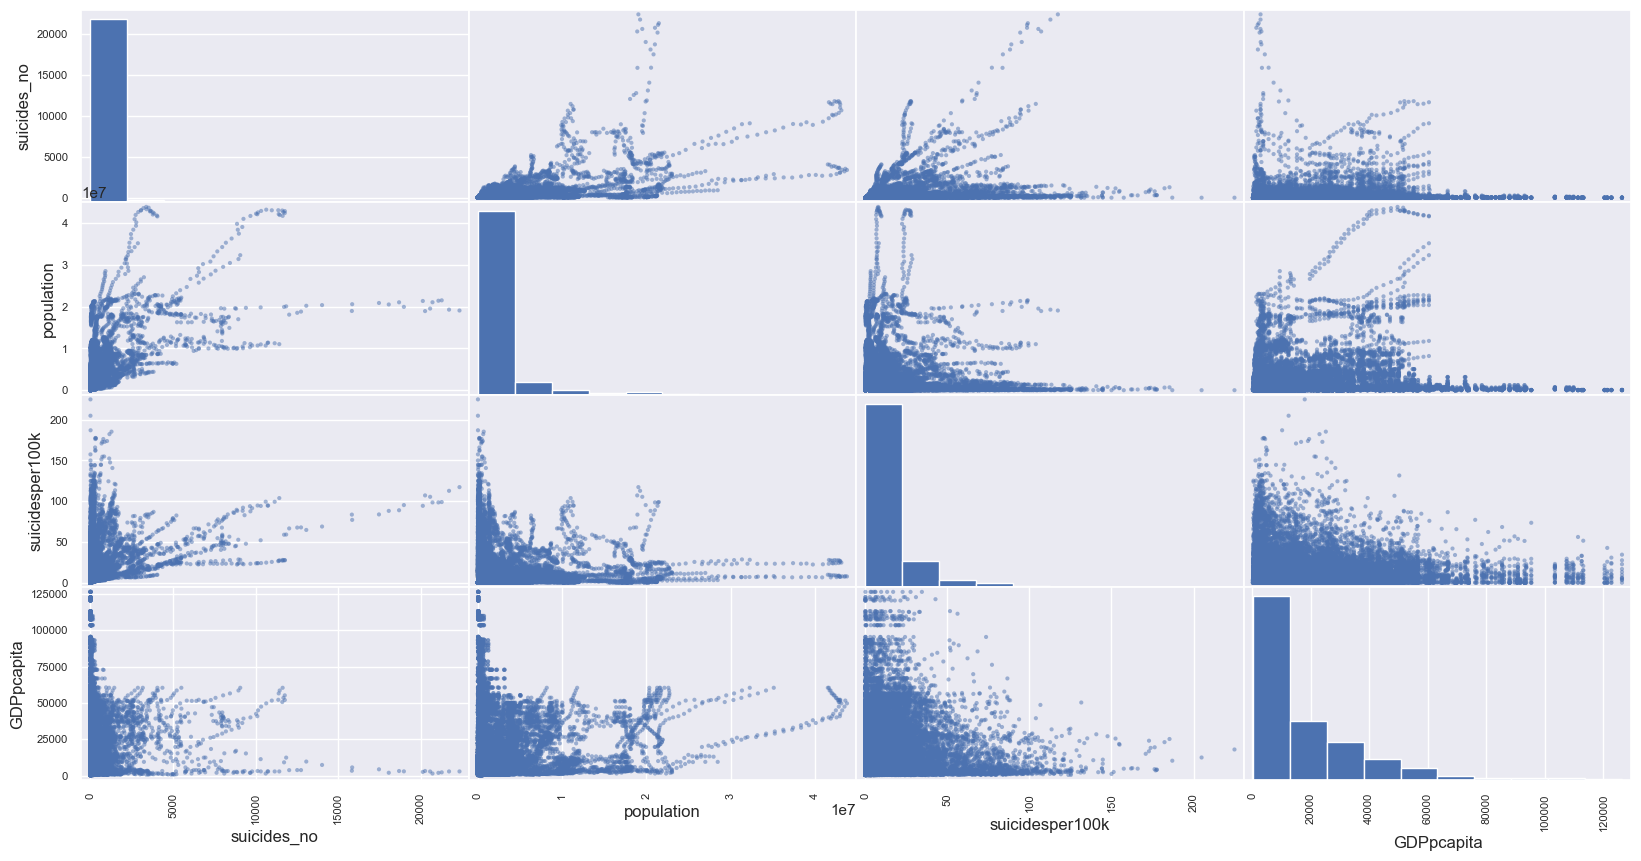

In [26]:
plt.figure(figsize=(20,10))
attributes = ['suicides_no', 'population', 'suicidesper100k','GDPpyear', 'GDPpcapita']
scatter_matrix(df[attributes], figsize=(20,10))
plt.show()

Доя дальнейшей работы с данными мы должны их очистить.

In [27]:
df.describe()

,year,suicides_no,population,suicidesper100k,GDPpcapita
count,27660.000000,27660.000000,2.766000e+04,27660.000000,27660.000000
mean,2001.173102,243.413485,1.850689e+06,12.812597,16815.568330
std,8.418754,904.490185,3.920658e+06,18.972063,18861.585497
min,1985.000000,0.000000,2.780000e+02,0.000000,251.000000
25%,1994.000000,3.000000,9.753525e+04,0.910000,3436.000000
50%,2002.000000,25.000000,4.307250e+05,5.980000,9283.000000
75%,2008.000000,132.000000,1.491041e+06,16.602500,24796.000000
max,2015.000000,22338.000000,4.380521e+07,224.970000,126352.000000


In [28]:
# df = df.dropna()
# df.shape

Столбец страна-год представляет собой комбинацию столбцов страны и года. Так что удалим эту колонку.

In [29]:
df = df.drop(['country-year'], axis = 1)
df.shape

(27660, 10)

In [30]:
df = df.dropna()
df.shape

(27660, 10)

Столбцы с нечисловыми данными такие, как страна, год, пол, и поколение должны быть преобразованы в числовые, что можно сделать с помощью LabelEncoder от SkLearn.

In [31]:
from sklearn.preprocessing import LabelEncoder
categorical = ['country', 'year','age', 'sex', 'generation']
le = sklearn.preprocessing.LabelEncoder()

for column in categorical:
    df[column] = le.fit_transform(df[column])

Cоздаем копиию набора данных для статистического теста

In [32]:
stat_df = df.copy()
stat_df

,country,year,sex,age,suicides_no,population,suicidesper100k,GDPpyear,GDPpcapita,generation
0,0,2,1,0,21,312900,6.71,"2,156,624,900",796,2
1,0,2,1,2,16,308000,5.19,"2,156,624,900",796,5
2,0,2,0,0,14,289700,4.83,"2,156,624,900",796,2
3,0,2,1,5,1,21800,4.59,"2,156,624,900",796,1
4,0,2,1,1,9,274300,3.28,"2,156,624,900",796,0
...,...,...,...,...,...,...,...,...,...,...
27815,99,29,0,2,107,3620833,2.96,"63,067,077,179",2309,2
27816,99,29,0,5,9,348465,2.58,"63,067,077,179",2309,5
27817,99,29,1,3,60,2762158,2.17,"63,067,077,179",2309,3
27818,99,29,0,3,44,2631600,1.67,"63,067,077,179",2309,3


In [33]:
# Преобразование столбца 'GDPpyear' в значение float из object
df['GDPpyear'] = df['GDPpyear'].str.replace(',','').astype(float)

In [34]:
# Масштабирование столбцов числовых данных с помощью Robust Scalar
numerical = ['suicides_no', 'population', 'suicidesper100k', 
              'GDPpyear','GDPpcapita']

from sklearn.preprocessing import RobustScaler

rc = RobustScaler()
df[numerical] = rc.fit_transform(df[numerical])
df

,country,year,sex,age,suicides_no,population,suicidesper100k,GDPpyear,GDPpcapita,generation
0,0,2,1,0,-0.031008,-0.084553,0.046519,-0.182533,-0.397331,2
1,0,2,1,2,-0.069767,-0.088069,-0.050343,-0.182533,-0.397331,5
2,0,2,0,0,-0.085271,-0.101202,-0.073283,-0.182533,-0.397331,2
3,0,2,1,5,-0.186047,-0.293450,-0.088577,-0.182533,-0.397331,1
4,0,2,1,1,-0.124031,-0.112253,-0.172057,-0.182533,-0.397331,0
...,...,...,...,...,...,...,...,...,...,...
27815,99,29,0,2,0.635659,2.289268,-0.192449,0.059920,-0.326498,2
27816,99,29,0,5,-0.124031,-0.059031,-0.216664,0.059920,-0.326498,5
27817,99,29,1,3,0.271318,1.673070,-0.242791,0.059920,-0.326498,3
27818,99,29,0,3,0.147287,1.579380,-0.274653,0.059920,-0.326498,3


Разделим данные на обучающие и тестовые наборы, разделенные в соотношении 80-20.

In [35]:
# Разделение и назначение функций и целевых столбцов X и Y
y = df['suicidesper100k']
X = df.drop('suicidesper100k',axis=1)
X.shape, y.shape

((27660, 9), (27660,))

In [36]:
# Разделение набора данных на обучающие и тестовые наборы: разделение 80-20
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((22128, 9), (5532, 9))

Модели контролируемого машинного обучения (регрессии), рассматриваемые для обучения набора данных в этом случае:Линейная регрессия и Случайный лес. Метрики, рассматриваемые для оценки производительности модели, — это точность и среднеквадратическая ошибка.

In [37]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

In [38]:
# Создание держателей для хранения результатов работы модели
ML_Model = []
acc_train = []
acc_test = []
rmse_train = []
rmse_test = []

#функция для сохранения результатов
def storeResults(model, a,b,c,d):
    ML_Model.append(model)
    acc_train.append(round(a, 3))
    acc_test.append(round(b, 3))
    rmse_train.append(round(c, 3))
    rmse_test.append(round(d, 3))

### Линенйая регрессия 
Линейная регрессия, или обычный метод наименьших квадратов (OLS), является самым простым и классическим линейным методом регрессии. Линейная регрессия находит параметры w и b, которые минимизируют среднеквадратичную ошибку между прогнозами и истинными целями регрессии, y, на обучающем наборе.

In [39]:
from sklearn.linear_model import LinearRegression

# instantiate the model
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [40]:
# прогнозирование целевого значения из модели для выборок
y_test_lr = lr.predict(X_test)
y_train_lr = lr.predict(X_train)

In [41]:
lr_y_pred = lr.predict(X_test)

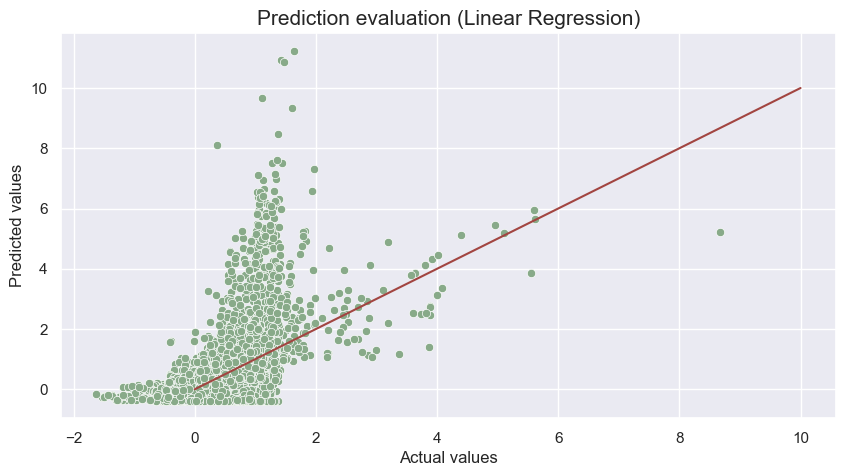

In [42]:
fig, ax = plt.subplots(figsize=(10,5))
sns.scatterplot(x=lr_y_pred,y=y_test, ax=ax, color='#88aa89')
sns.lineplot(x=[0, 10], y=[0, 10], ax=ax,color = '#a24541' )
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.title('Prediction evaluation (Linear Regression)', size=15)
plt.show()

In [43]:
acc_train_lr = lr.score(X_train, y_train)
acc_test_lr = lr.score(X_test, y_test)

#computing root mean squared error (RMSE)
rmse_train_lr = np.sqrt(mean_squared_error(y_train, y_train_lr))
rmse_test_lr = np.sqrt(mean_squared_error(y_test, y_test_lr))

print("Linear Regression: Accuracy on training Data: {:.3f}".format(acc_train_lr))
print("Linear Regression: Accuracy on test Data: {:.3f}".format(acc_test_lr))
print('\nLinear Regression: The RMSE of the training set is:', rmse_train_lr)
print('Linear Regression: The RMSE of the testing set is:', rmse_test_lr)

Linear Regression: Accuracy on training Data: 0.290
Linear Regression: Accuracy on test Data: 0.290

Linear Regression: The RMSE of the training set is: 1.020777880104278
Linear Regression: The RMSE of the testing set is: 1.0109643316827945


Производительность модели не очень хороша, но мы видим, что оценки по наборам тренировок и тестов очень близки друг к другу.

### Случайный лес
Случайные леса для регрессии и классификации в настоящее время являются одними из наиболее широко используемых методов машинного обучения. Случайный лес — это, по сути, набор деревьев решений, где каждое дерево немного отличается от других. Идея случайных лесов заключается в том, что каждое дерево может делать относительно хорошие прогнозы, но, скорее всего, будет соответствовать части данных. 

In [44]:
from sklearn.ensemble import RandomForestRegressor
from pprint import pprint
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

Для более точного использования модели, мы бдуем настраивать параметр max_depth c помощью GridSearchCV 

In [46]:
forest = RandomForestRegressor()
parametrs = { 'max_depth': range (1,31)}
forest_grid = GridSearchCV(estimator = forest,param_grid=parametrs,cv = 5)

forest_grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_depth': range(1, 31)})

In [47]:
forest_grid.best_params_

{'max_depth': 27}

In [48]:
y_test_forest = forest_grid.predict(X_test)
y_train_forest = forest_grid.predict(X_train)

In [49]:
acc_train_forest = forest_grid.score(X_train, y_train)
acc_test_forest = forest_grid.score(X_test, y_test)


rmse_train_forest = np.sqrt(mean_squared_error(y_train, y_train_forest))
rmse_test_forest = np.sqrt(mean_squared_error(y_test, y_test_forest))

print("Random Forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random Forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))
print('\nRandom Forest: The RMSE of the training set is: ', rmse_train_forest)
print('Random Forest: The RMSE of the testing set is: ', rmse_test_forest)

Random Forest: Accuracy on training Data: 0.999
Random Forest: Accuracy on test Data: 0.994

Random Forest: The RMSE of the training set is:  0.04392333195249047
Random Forest: The RMSE of the testing set is:  0.09613067997626877


Случайный лес дает нам точность 99,9%, лучше, чем линейные модели. Но это также может быть случаем переобучения.

### Вывод.

Исходя из анализа данных страны с самым высоким показателем самоубийств - Россия. Это связано с разными причинами, но основные это экономическая и политическая ситуация в стране. Чаще всего заканчивают жизнь самоубийством мужчины. Среди них в возрасте от 35-54.
Так же были использованы линейная регрессия и Случайный лес для предсказания коэффициента самоуюйиств. Было выявленно, что линейная регрессия не подходит для данного набора данных.